In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 2

First the Jacobi Implementation to check the iterations for the given matrix

In [2]:
def jacobi(A,b,x0,max_iter=10):
    n = len(b)
    x = x0.copy()
    history = [x.copy()]

    D = np.diag(np.diag(A))
    L_plus_U = A - D
    D_inv = np.diag(1 / np.diag(D))

    for _ in range(max_iter):
        x_new = D_inv @ (b - L_plus_U @ x)
        history.append(x_new.copy())
        x = x_new
    return x, history

# Define the system
A = np.array([[2, -1, 0],
              [-1, 2, -1],
              [0, -1, 2]], dtype=float)
b = np.array([1, 0, 1], dtype=float)

# Case 1: Initial guess x0 = [0, 0, 0]
x0_1 = np.array([0, 0, 0], dtype=float)
x_sol_1, history_1 = jacobi(A, b, x0_1, max_iter=2)

# Case 2: Initial guess x0 = [0, 1, 2]
x0_2 = np.array([0, 1, 2], dtype=float)
x_sol_2, history_2 = jacobi(A, b, x0_2, max_iter=2)

# Print results
print("Case 1: x0 = [0, 0, 0]")
print(f"x(1) = {history_1[1]}")
print(f"x(2) = {history_1[2]}\n")

print("Case 2: x0 = [0, 1, 2]")
print(f"x(1) = {history_2[1]}")
print(f"x(2) = {history_2[2]}")

Case 1: x0 = [0, 0, 0]
x(1) = [0.5 0.  0.5]
x(2) = [0.5 0.5 0.5]

Case 2: x0 = [0, 1, 2]
x(1) = [1. 1. 1.]
x(2) = [1. 1. 1.]


In [3]:
def gauss_seidel(A,b,x0,max_iter=10):
    n = len(b)
    x = x0.copy()
    history = [x.copy()]
    for _ in range(max_iter):
        x_new = x.copy()
        for i in range(n):
             x_new[i] = (b[i] - np.dot(A[i, :i], x_new[:i]) - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
        history.append(x_new.copy())
        x = x_new
    return x, history

A = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]], dtype=float)
b = np.array([1, 0, 1], dtype=float)

# Initial guess x0 = [0, 0, 0]
x0 = np.array([0, 0, 0], dtype=float)
x_sol, history = gauss_seidel(A, b, x0, max_iter=2)
print("x(1) =", history[1])
print("x(2) =", history[2])

# Initial guess x0 = [0, 1, 2]
x0 = np.array([0, 1, 1], dtype=float)
x_sol, history = gauss_seidel(A, b, x0, max_iter=2)
print("x(1) =", history[1])
print("x(2) =", history[2])

x(1) = [0.5   0.25  0.625]
x(2) = [0.625  0.625  0.8125]
x(1) = [1. 1. 1.]
x(2) = [1. 1. 1.]


We can now compare the spectral radius of the Jacobi iteration and the spectral radius of the Gauss-Seidel Method


In Jacobi we had:

\begin{equation}
\rho(B_j) = max \{ |0|, |\sqrt{2}/2|, |-\sqrt{2}/2| \}
\end{equation}

and with the Gauss-Seidel Method we have:

\begin{equation}
\rho(B_{gs}) = max \{ |0|, |0|, |1/2| \}
\end{equation}


# Exercise 3

Objective is to analyze Jacobi, Gauss-Seidel and relaxation method in the case of a tridiagonal matrix obtained by discretizing the diffusion operator. The matrix $A \in M_n(\mathbb{R})$ is given by 

\begin{equation}
A = \begin{pmatrix}
2 & -1 & 0 & \cdots & 0 \\
-1 & 2 & -1 & \cdots & 0 \\
0 & -1 & 2 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 2
\end{pmatrix} \in M_n(\mathbb{R}).
\end{equation}

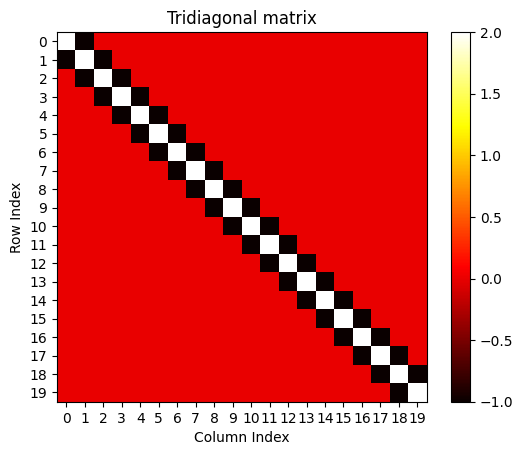

In [4]:
def tridiag(n,a,b,c):
    """ 
    Creates a tridiagonal matrix of size n x n 
    """
    matrix = np.zeros((n, n))
    np.fill_diagonal(matrix, b)
    np.fill_diagonal(matrix[:-1, 1:], a)
    np.fill_diagonal(matrix[1:, :-1], c)
    return matrix

n= 20
a = -1
b = 2
c = -1
A = tridiag(n, a, b, c)
plt.imshow(A, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Tridiagonal matrix')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.xticks(np.arange(n), np.arange(n))
plt.yticks(np.arange(n), np.arange(n))
plt.grid(False)
plt.show()

In [5]:
def check_diagonal_dominance(matrix):
    """ 
    Checks if a matrix is diagonally dominant
    """
    n = matrix.shape[0]
    for i in range(n):
        # obtain the diagonal elements
        diag_element = abs(matrix[i, i])
        # this must be bigger than the sum of the of diagonal elements
        off_diag_sum = sum(abs(matrix[i, j]) for j in range(n) if j != i)
        if diag_element < off_diag_sum:
            return False
    return True

# Check if the tridiagonal matrix is diagonally dominant
check_diagonal_dominance(A)

True

## Part 1 write a python code to factorize A using Jacobi, Gauss-Seidel and SOR Methods


**Jacobi Method**:

In general a $n \times n$ matrix $A$ is strictly diagonally dominant if for each $i$, $1 \leq i \leq n$, $|a_{ii}| > \sum_{j \neq i} |a_{ij}|$. The Jacobi method converges for strictly diagonally dominant matrices.

We can rewrite the linear System $Ax = b$ as:

\begin{equation}
(L + D + U)x  = b
\end{equation}

where $L$ is the lower triangular part of $A$, $D$ is the diagonal part of $A$, and $U$ is the upper triangular part of $A$.

Rewriting the equation 20 gives

\begin{equation}
x = D^{-1}(b - (L + U)x)
\end{equation}

Thus we can denote the Jacobi iteration as:

\begin{equation}
x^{(k+1)} = D^{-1}(b - (L + U)x^{(k)})
\end{equation}

In [6]:
def jacobi(A,b,x_0,k):
    """ 
    Performs k steps of the jacobi method

    A: matrix of coefficients
    b: right hand side vector
    x_0: initial guess vector
    k: number of iterations to perform
    """
    d = np.diag(A)
    r = A - np.diag(d) # remainder of A after removing diagonal
    # Initialize the solution vector
    x = np.copy(x_0)
    for j in range(k):
        x = (b - np.dot(r, x)) / d
    return x




In [7]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [8]:
# Test the Jacobi method
A = tridiag(2, -1, 2, -1)  # 2x2 tridiagonal matrix
n = 2
b = np.ones(n)  # Right-hand side vector
x0 = np.zeros(n)  # Initial guess
k = 25

fig, ax = plt.subplots(figsize=(12,5))
true_sol = np.linalg.solve(A, b)  # True solution for comparison

def animate(i):
    ax.cla()
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    x = jacobi(A, b, x0, i)
    ax.plot(x[0], x[1], "o", ms=8, label="Jacobi")
    ax.plot(true_sol[0], true_sol[1], "o", ms=8, label="True Solution")
    ax.axhline()
    ax.axvline()
    ax.set_title(f"Jacobi Method Iteration {i}")
    ax.legend()
plt.close()
anim = FuncAnimation(fig, animate, frames=k, interval=100, repeat=False)
HTML(anim.to_html5_video())

**Gauss-Seidel Method**:

We can equivalently derive the Gauss-Seidel Iteration with the matrix notation:

\begin{equation}
(L + D)x = b - Ux
\end{equation}

Which gives us the Iteration:

\begin{equation}
(L + D)x^{(k+1)} = b - Ux^{(k)}
\end{equation}

which can be rewritten as:

\begin{equation}
x^{(k+1)} = D^{-1}(b-Ux^{(k)} - Lx^{(k+1)})
\end{equation}

In [9]:
def Gauss_Seidel(A,b,x_0,k):
    """ 
    Performs k steps of the Gauss-Seidel method

    A: matrix of coefficients
    b: right hand side vector
    x_0: initial guess vector
    k: number of iterations to perform
    """
    n = A.shape[0]
    x = x_0.copy()

    for l in range(k):
        for i in range(n):
            sum = 0
            for j in range(n):
                if i != j:
                    sum += A[i, j] * x[j] # Just rewritte Ux^k - Lx⁽k+1)
            x[i] = (b[i] - sum) / A[i, i]
    return x



In [10]:
# Example usage of the Gauss-Seidel method
A = tridiag(2, -1, 2, -1)  # 2x2 tridiagonal matrix
n = 2
b = np.ones(n)  # Right-hand side vector
x0 = np.zeros(n)  # Initial guess
k = 25
fig, ax = plt.subplots(figsize=(12,5))
true_sol = np.linalg.solve(A, b)  # True solution for comparison
def animate_gs(i):
    ax.cla()
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    x = Gauss_Seidel(A, b, x0, i)
    ax.plot(x[0], x[1], "o", ms=8, label="Gauss-Seidel")
    ax.plot(true_sol[0], true_sol[1], "o", ms=8, label="True Solution")
    ax.axhline()
    ax.axvline()
    ax.set_title(f"Gauss-Seidel Method Iteration {i}")
    ax.legend()
plt.close()
anim_gs = FuncAnimation(fig, animate_gs, frames=k, interval=100, repeat=False)
HTML(anim_gs.to_html5_video())

**SOR Method**:

The SOR Method introduces a additional relaxation parameter if $\omega=1$ it is analogous to the Gauss-Seidel Method. 

To derive this we consider

\begin{equation}
\omega(L+D+U)x = \omega b
\end{equation}

\begin{equation}
(\omega(L + U) + (\omega - 1)D + D)x = \omega b
\end{equation}

which finally gives us the iteration:

\begin{equation}
x^{(k+1)} = D^{-1}\omega(b - Ux^{(k)} - Lx^{(k+1)}) + (1- \omega)x^{(k)}
\end{equation}

In [11]:
def SOR(A,b,x_0,omega,k):
    """ 
    Performs k steps of th SOR method
    A: matrix of coefficients
    b: right hand side vector
    x_0: initial guess vector
    omega: relaxation factor (0 < omega < 2)
    k: number of iterations to perform
    """

    n = A.shape[0]
    x = x_0.copy()
    for l in range(k):
        for i in range(n):
            sum = 0.
            for j in range(n):
                if i != j:
                    sum += A[i, j] * x[j]
            x[i] = omega*(b[i] - sum) / A[i, i] + (1 - omega) * x[i]
    return x


In [12]:
# try out the sor method with w = 0.5

A = tridiag(2, -1, 2, -1)  # 2x2 tridiagonal matrix
n = 2
b = np.ones(n)  # Right-hand side vector
x0 = np.zeros(n)  # Initial guess
omega = 0.5  # Relaxation factor
k = 25
fig, ax = plt.subplots(figsize=(12,5))
true_sol = np.linalg.solve(A, b)  # True solution for comparison
def animate_sor(i):
    ax.cla()
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    x = SOR(A, b, x0, omega, i)
    ax.plot(x[0], x[1], "o", ms=8, label="SOR")
    ax.plot(true_sol[0], true_sol[1], "o", ms=8, label="True Solution")
    ax.axhline()
    ax.axvline()
    ax.set_title(f"SOR Method Iteration {i}")
    ax.legend()
plt.close()
anim_sor = FuncAnimation(fig, animate_sor, frames=k, interval=100, repeat=False)
HTML(anim_sor.to_html5_video())

## Part 2

As an Application we consider the right-side vector $b = (1,0,...,0,1)^T$ and $n=10$ to solve the system $Ax=b$ using $N_{iter}=100$ and $w = 3/2 

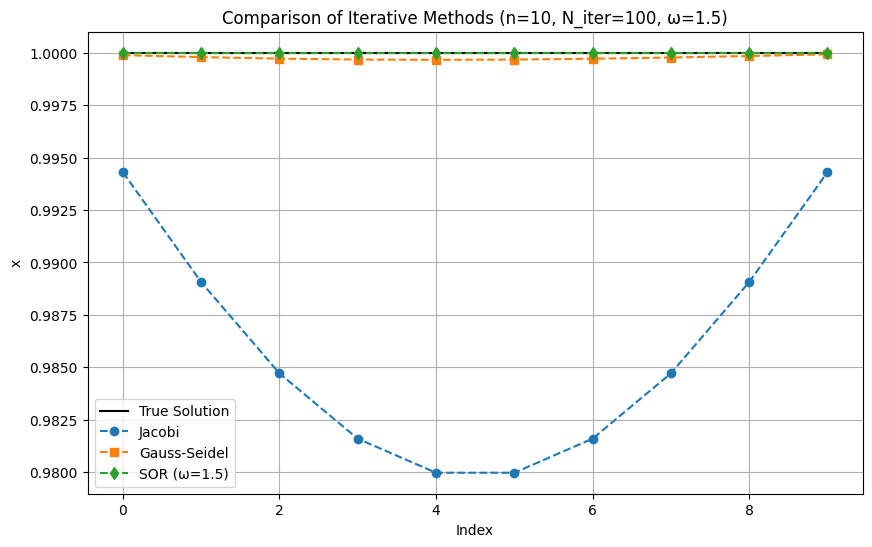

In [13]:
# Set up the problem for n=10, b=(1,0,...,0,1)^T, N_iter=100, omega=1.5
n_app = 10
A_app = tridiag(n_app, -1, 2, -1)
b_app = np.zeros(n_app)
b_app[0] = 1
b_app[-1] = 1
x0_app = np.zeros(n_app)
N_iter = 100
omega_app = 3/2
true_sol_app = np.linalg.solve(A_app, b_app)

# Run all three methods
x_jacobi = jacobi(A_app, b_app, x0_app, N_iter)
x_gs = Gauss_Seidel(A_app, b_app, x0_app, N_iter)
x_sor = SOR(A_app, b_app, x0_app, omega_app, N_iter)

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(true_sol_app, 'k-', label='True Solution')
plt.plot(x_jacobi, 'o--', label='Jacobi')
plt.plot(x_gs, 's--', label='Gauss-Seidel')
plt.plot(x_sor, 'd--', label='SOR (ω=1.5)')
plt.xlabel('Index')
plt.ylabel('x')
plt.title('Comparison of Iterative Methods (n=10, N_iter=100, ω=1.5)')
plt.legend()
plt.grid(True)
plt.show()

## Part 3

Now consider $n=20$ and determine the optimal parameter for the SOR method. Plot the spectral radius of the matrix of iteration obtained in term of the relaxation parameter $\omega$.

Optimal ω: 1.7476, Minimum Spectral Radius: 0.7476


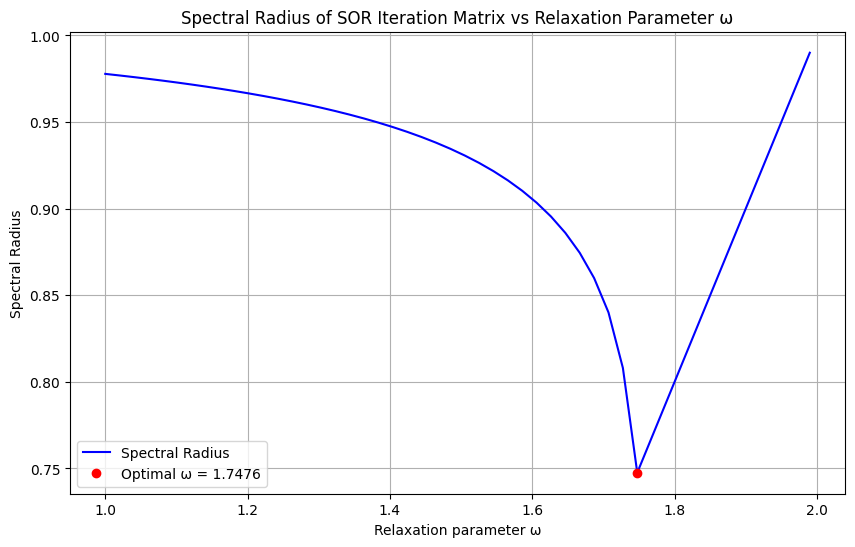

In [14]:
n_opt = 20
A_opt = tridiag(n_opt, -1, 2, -1)

def sor_iteration_matrix(A, omega):
    n = A.shape[0]
    D = np.diag(np.diag(A))
    L = np.tril(A, -1)
    U = np.triu(A, 1)
    DL_inv = np.linalg.inv(D + omega *L)
    G_Sor = DL_inv @ ((1 - omega) * D - omega * U)
    return G_Sor

def find_optimal_omega(n=20, omega_min=1.0, omega_max=1.99, num_points=50):
    """Find optimal omega by computing spectral radius of iteration matrix"""
    A = tridiag(n, -1, 2, -1)
    omega_values = np.linspace(omega_min, omega_max, num_points)
    spectral_radii = []

    # Make a grid search with different omega values and compute the sor iteration matrix
    
    for omega in omega_values:
        G_SOR = sor_iteration_matrix(A, omega)
        eigenvalues = np.linalg.eigvals(G_SOR)
        spectral_radius = np.max(np.abs(eigenvalues))
        spectral_radii.append(spectral_radius)
    
    optimal_idx = np.argmin(spectral_radii)
    optimal_omega = omega_values[optimal_idx]
    min_spectral_radius = spectral_radii[optimal_idx]
    
    return omega_values, spectral_radii, optimal_omega, min_spectral_radius

def plot_spectral_radius(omega_values, spectral_radii, optimal_omega, min_spectral_radius):
    """Plot spectral radius vs omega"""
    plt.figure(figsize=(10, 6))
    plt.plot(omega_values, spectral_radii, 'b-', label='Spectral Radius')
    plt.plot(optimal_omega, min_spectral_radius, 'ro', label=f'Optimal ω = {optimal_omega:.4f}')
    plt.xlabel('Relaxation parameter ω')
    plt.ylabel('Spectral Radius')
    plt.title('Spectral Radius of SOR Iteration Matrix vs Relaxation Parameter ω')
    plt.grid(True)
    plt.legend()
    plt.show()

# Main execution for n=20
n = 20
omega_values, spectral_radii, optimal_omega, min_spectral_radius = find_optimal_omega(n)

print(f"Optimal ω: {optimal_omega:.4f}, Minimum Spectral Radius: {min_spectral_radius:.4f}")

plot_spectral_radius(omega_values, spectral_radii, optimal_omega, min_spectral_radius)

In [15]:
import pandas as pd

def iterations_to_tolerance(A, b, x0, method, tol=1e-12, max_iter=10000, omega=None):
    """ 
    Uses the three iterations to obtain the number of iterations needed to reach a given tolerance
    """
    true_sol = np.linalg.solve(A, b)
    x = x0.copy()
    for k in range(1, max_iter+1):
        if method == 'jacobi':
            x = jacobi(A, b, x0, k)
        elif method == 'gs':
            x = Gauss_Seidel(A, b, x0, k)
        elif method == 'sor':
            x = SOR(A, b, x0, omega, k)
        else:
            raise ValueError("Unknown method")
        if np.linalg.norm(x - true_sol, np.inf) < tol:
            return k
    return max_iter

ns = [1,2,3,4,5,6,7,8,9,10,15,20]
results = {'n': [], 'jacobi': [], 'gs': [], 'sor': [], 'rho_jacobi': [], 'rho_gs': [], 'rho_sor': []}

for n in ns:
    A = tridiag(n, -1, 2, -1)
    b = np.zeros(n)
    b[0] = 1
    b[-1] = 1
    x0 = np.zeros(n)
    omega = 1.5  # Example relaxation factor for SOR

    # Compute the number of iterations for each method
    jacobi_iter = iterations_to_tolerance(A, b, x0, 'jacobi')
    gs_iter = iterations_to_tolerance(A, b, x0, 'gs')
    sor_iter = iterations_to_tolerance(A, b, x0, 'sor', omega=omega)

    # Compute the spectral radius for each method
    rho_jacobi = np.max(np.abs(np.linalg.eigvals(sor_iteration_matrix(A, 1))))
    rho_gs = np.max(np.abs(np.linalg.eigvals(sor_iteration_matrix(A, 1))))
    rho_sor = np.max(np.abs(np.linalg.eigvals(sor_iteration_matrix(A, omega))))

    # Add to the solution dictionary
    results['n'].append(n)
    results['jacobi'].append(jacobi_iter)
    results['gs'].append(gs_iter)
    results['sor'].append(sor_iter)
    results['rho_jacobi'].append(rho_jacobi)
    results['rho_gs'].append(rho_gs)
    results['rho_sor'].append(rho_sor)
# Convert results to a DataFrame
results_df = pd.DataFrame(results)
# Display the results
print(results_df)

     n  jacobi    gs  sor  rho_jacobi    rho_gs   rho_sor
0    1       1     1   39    0.000000  0.000000  0.500000
1    2      40    21   40    0.250000  0.250000  0.500000
2    3      80    41   41    0.500000  0.500000  0.500000
3    4     132    67   41    0.654508  0.654508  0.500000
4    5     195    98   42    0.750000  0.750000  0.500000
5    6     267   135   41    0.811745  0.811745  0.500000
6    7     352   177   43    0.853553  0.853553  0.500000
7    8     448   225   43    0.883022  0.883022  0.500000
8    9     555   279   68    0.904508  0.904508  0.651291
9   10     674   338   91    0.920627  0.920627  0.728007
10  15    1436   719  221    0.961940  0.961940  0.880404
11  20    2482  1242  396    0.977786  0.977786  0.931690


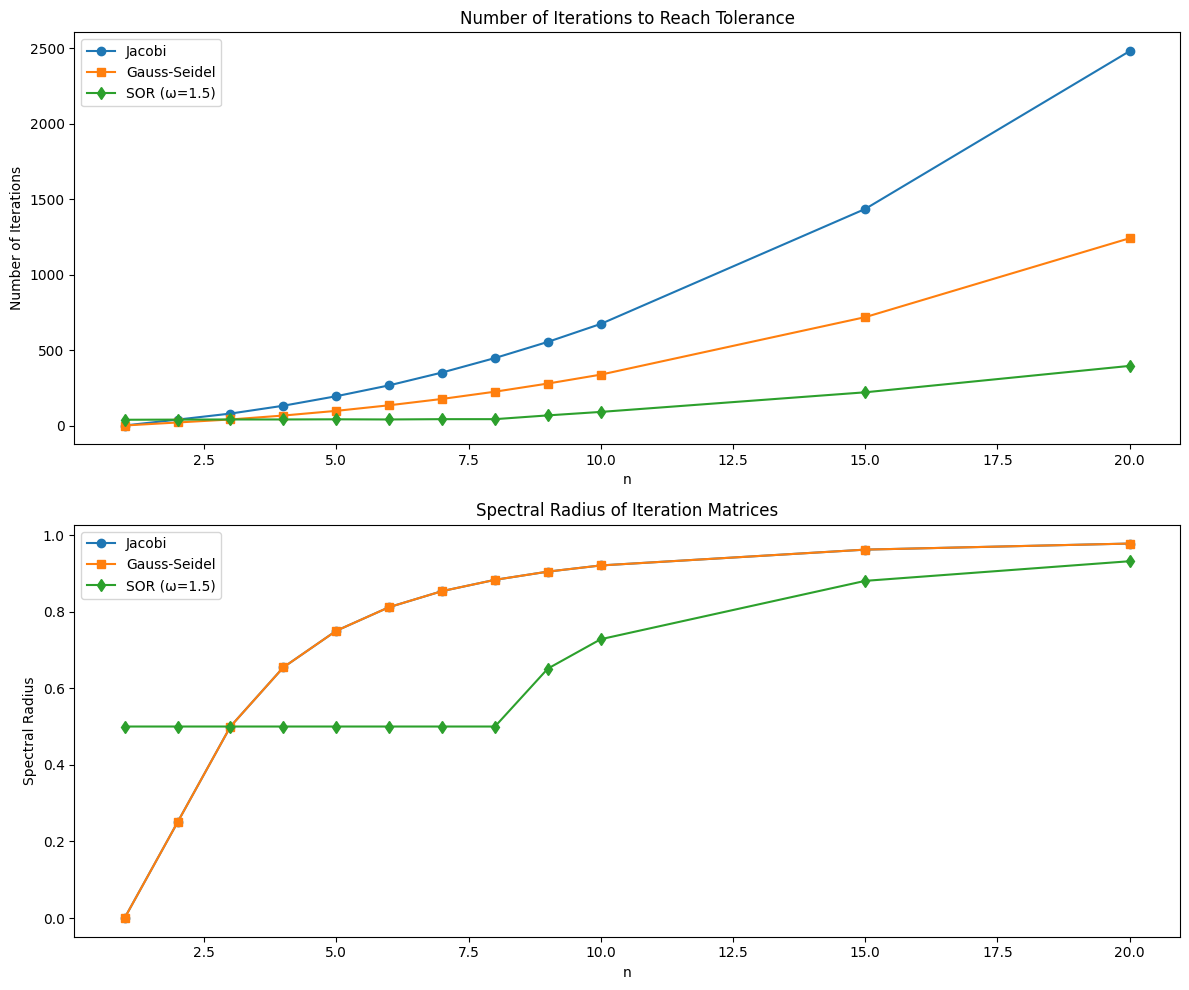

In [16]:
# plot two suplots with the number of iterations and the spectral radius
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
# Plot number of iterations
ax1.plot(results_df['n'], results_df['jacobi'], 'o-', label='Jacobi')
ax1.plot(results_df['n'], results_df['gs'], 's-', label='Gauss-Seidel')
ax1.plot(results_df['n'], results_df['sor'], 'd-', label='SOR (ω=1.5)')
ax1.set_xlabel('n')
ax1.set_ylabel('Number of Iterations')
ax1.set_title('Number of Iterations to Reach Tolerance')
ax1.legend()
# Plot spectral radius
ax2.plot(results_df['n'], results_df['rho_jacobi'], 'o-', label='Jacobi')
ax2.plot(results_df['n'], results_df['rho_gs'], 's-', label='Gauss-Seidel')
ax2.plot(results_df['n'], results_df['rho_sor'], 'd-', label='SOR (ω=1.5)')
ax2.set_xlabel('n')
ax2.set_ylabel('Spectral Radius')
ax2.set_title('Spectral Radius of Iteration Matrices')
ax2.legend()
plt.tight_layout()
plt.show()